In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
g, π = 9.81, math.pi

def sin(α):
    return math.sin(α)

def cos(α):
    return math.cos(α)

def to_rad(α):
    return int(α)*π/180

def eqn(time, v, α, h):
    r = v*cos(to_rad(α))*time
    y = h+(v*sin(to_rad(α))*time - 0.5*g*(time**2))
    return(r, y)

In [10]:
def trajec(u, φ, θ, d):

    
    def proj(β):
        x = []
        y = []
        t_ = []
        if d == 0.0:
            T = round(2*u*sin(to_rad(β))/g, 3)
        else:
            T = round((u*sin(to_rad(β)) + ((u*sin(to_rad(β)))**2+2*g*d)**0.5)/g, 3)
        t = 0.0
        while t<=T:
            x.append(round(eqn(t, u, β, d)[0], 2))
            y.append(round(eqn(t, u, β, d)[1], 2))
            t = t + 0.001
            t_.append(t)
        return x, y, t_
  
    def graphs():
            if φ == θ:
                plt.plot(proj(φ)[0], proj(φ)[1])
                plt.xlabel('Range')
                plt.ylabel('Height')
                plt.show()

                print(max(proj(φ)[0]))
            else:
                plt.plot(proj(φ)[0], proj(φ)[1])
                plt.plot(proj(θ)[0], proj(θ)[1])
                plt.legend(['φ', 'θ'])
                plt.xlabel('Range')
                plt.ylabel('Height')
                plt.show()
        
    def details():
        index = ['φ', 'θ']
        data = {'Angle (*)': [φ, θ], 
            'Max Height (m)':[max(proj(φ)[1]), max(proj(θ)[1])],
               'Range (m)':[max(proj(φ)[0]), max(proj(θ)[0])],
               'Time (s)':[proj(φ)[2][-1], proj(θ)[2][-1]]}
        df = pd.DataFrame(data = data)
        df.index = index
        if φ == θ:
            df = df.drop('θ', axis=0)
            return display(df)
        else:
            return display(df)
    
    return graphs(), details()

In [11]:
u = int(input("Enter the intitial velocity: "))
φ = int(input("Enter the first angle: "))
θ = int(input("Enter the second angle: "))
d = int(input("Enter the intitial height: "))

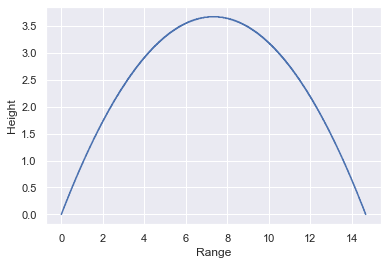

14.68


,Angle (*),Max Height (m),Range (m),Time (s)
φ,45,3.67,14.68,1.731


(None, None)

In [12]:
trajec(u, φ, θ, d)